In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import metpy.calc as mpcalc
from metpy.units import units

In [2]:
ds = xr.open_dataset('/glade/campaign/mmm/dpm/gbryan/hurr_les_1s/cm1out_000005.nc')

FileNotFoundError: [Errno 2] No such file or directory: '/glade/campaign/mmm/dpm/gbryan/hurr_les_1s/cm1out_000005.nc'

In [ ]:
num_x = ds.ni
num_y = ds.nj
num_z = ds.nk

dx = ds['xh']*units('m')
dy = ds['yh']*units('m')
dz = ds['zh']*units('m')

u10 = ds['u10']
v10 = ds['v10']
theta = ds['th']
press = ds['prs']
wv = ds['qv']
wc = ds['qc']
wr = ds['qr']
u = ds['u']
v = ds['v']
w = ds['w']

x_space = 31.25*units('m')
y_space = 31.25*units('m')
z_space = 15.625*units('m')

In [ ]:
dz[0] + 3*z_space # this gives the height of the third index of dz

In [ ]:
lev = 0

In [ ]:
u = u.isel(nk=lev)
v = v.isel(nk=lev)

In [ ]:
wspd = mpcalc.wind_speed(u, v)
wspd.max()

In [ ]:
dz[0]

In [3]:
wspd_10m = mpcalc.wind_speed(u10, v10)

NameError: name 'u10' is not defined

In [4]:
wspd_10m.values.min(),wspd_10m.values.max()

NameError: name 'wspd_10m' is not defined

Text(0.5, 1.0, 'Wind Speed (m/s) at 10 m')

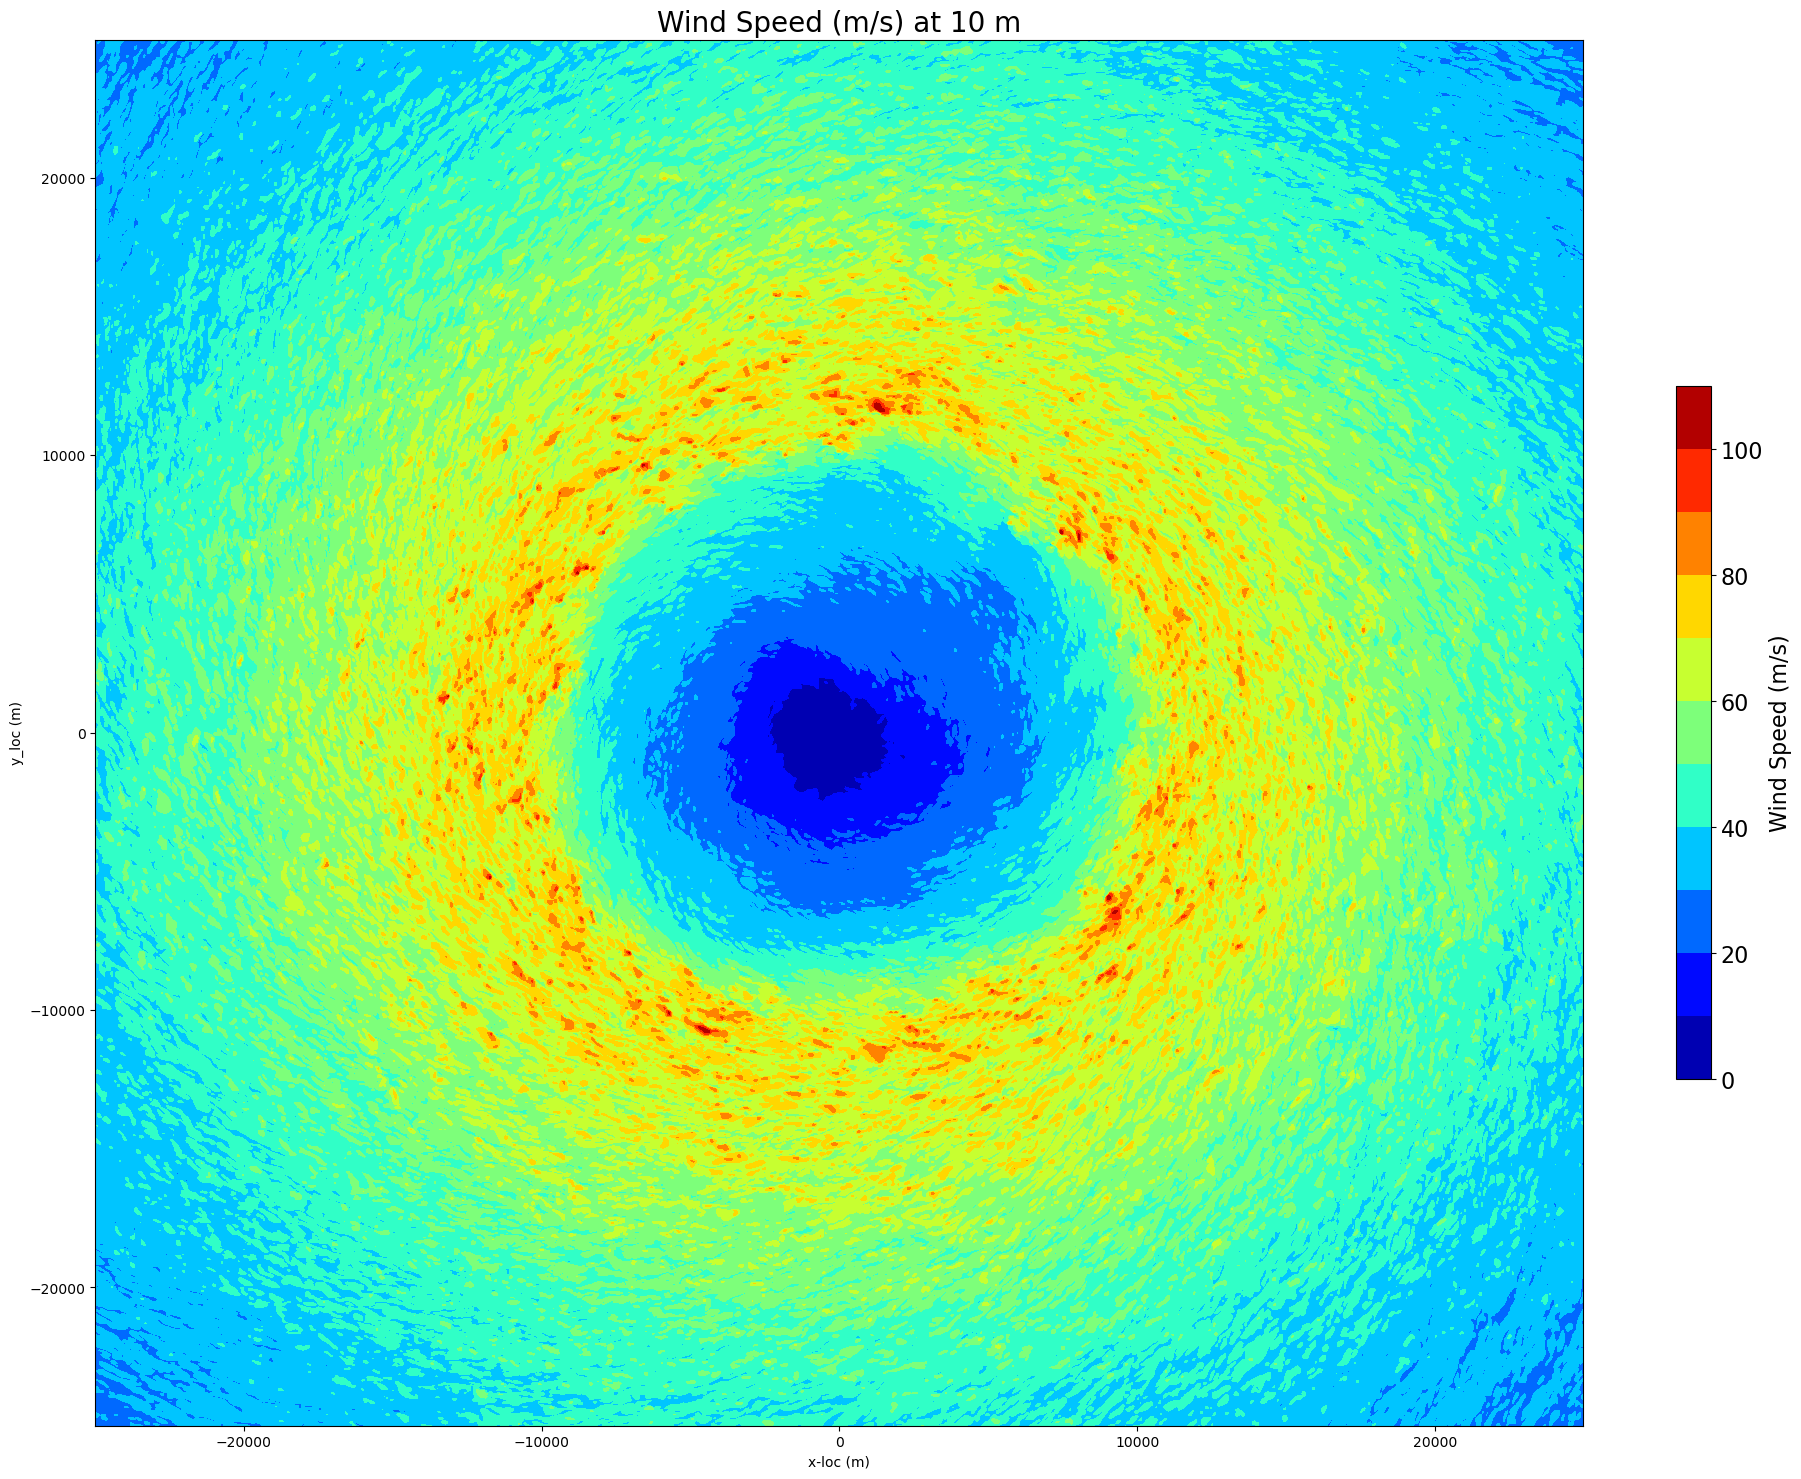

In [12]:
fig = plt.figure(figsize=(24,18))
ax=plt.subplot(1,1,1)
CF = ax.contourf(dx, dy, wspd_10m.isel(time=0), levels=np.arange(0, 115, 10), cmap='jet')
cbar = plt.colorbar(CF,shrink=0.5)
cbar.ax.tick_params(labelsize=16)
cbar.ax.set_ylabel("Wind Speed (m/s)",fontsize=16)
ax.set_xlabel('x-loc (m)')
ax.set_ylabel('y_loc (m)')
ax.set_title('Wind Speed (m/s) at 10 m', fontsize=20)

In [14]:
np.where(wspd_10m == wspd_10m.max())

(array([0]), array([1030]), array([1038]))

In [15]:
wspd.isel(nj=1030,ni=1038), dx.isel(ni=1038), dy.isel(nj=1030)

(<xarray.DataArray (time: 1)>
 <Quantity([57.328747], 'meter / second')>
 Coordinates:
   * time     (time) datetime64[ns] 2000-01-01T00:00:04,
 <xarray.DataArray 'xh' ()>
 <Quantity(7453.125, 'meter')>,
 <xarray.DataArray 'yh' ()>
 <Quantity(7203.125, 'meter')>)

Text(0.5, 1.0, 'Wind Speed (m/s) at 10 m -- Northeastern Quadrant')

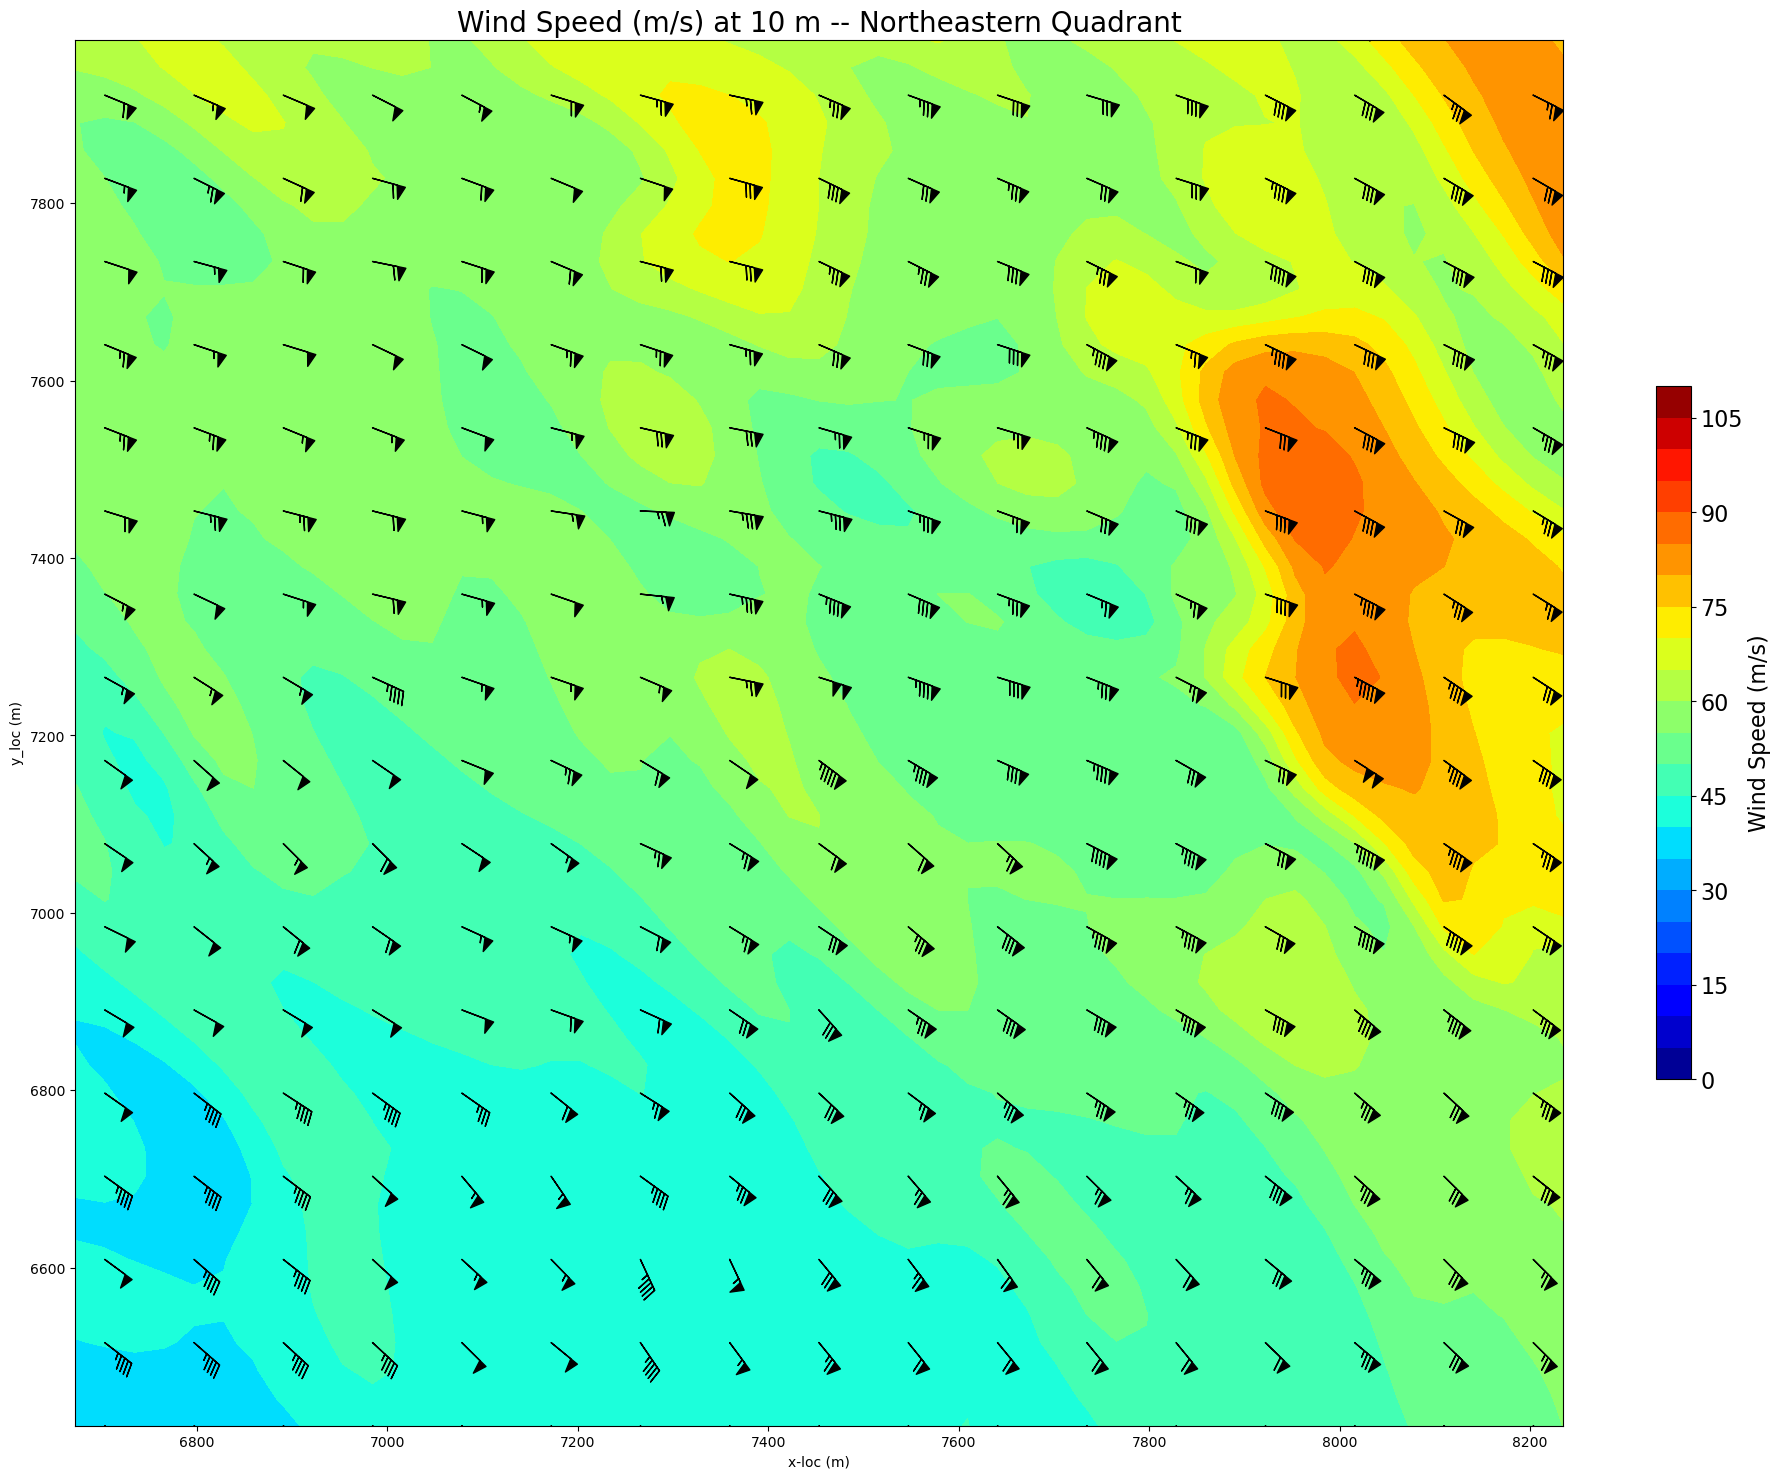

In [16]:
fig = plt.figure(figsize=(24,18))
ax=plt.subplot(1,1,1)
# 50 x 50 gridpoint plot surrounding the index location of wind speed maximum
ax.set_xlim(dx.isel(ni=1013), dx.isel(ni=1063)) # 25 below 1038 and 25 above 1038
ax.set_ylim(dy.isel(nj=1005), dy.isel(nj=1055)) # 25 below 1030 and 25 above 1030
CF = ax.contourf(dx, dy, wspd.isel(time=0), levels=np.arange(0, 115, 5), cmap='jet')
skip=3
ax.barbs(dx[::skip], dy[::skip], u10.isel(time=0)[::skip,::skip].values, v10.isel(time=0)[::skip,::skip].values)
cbar = plt.colorbar(CF,shrink=0.5)
cbar.ax.tick_params(labelsize=16)
cbar.ax.set_ylabel("Wind Speed (m/s)",fontsize=16)
ax.set_xlabel('x-loc (m)')
ax.set_ylabel('y_loc (m)')
ax.set_title('Wind Speed (m/s) at 10 m -- Northeastern Quadrant', fontsize=20)

Text(0.5, 1.0, 'Wind Speed (m/s) at Lowest Model Level (7.8125 m)')

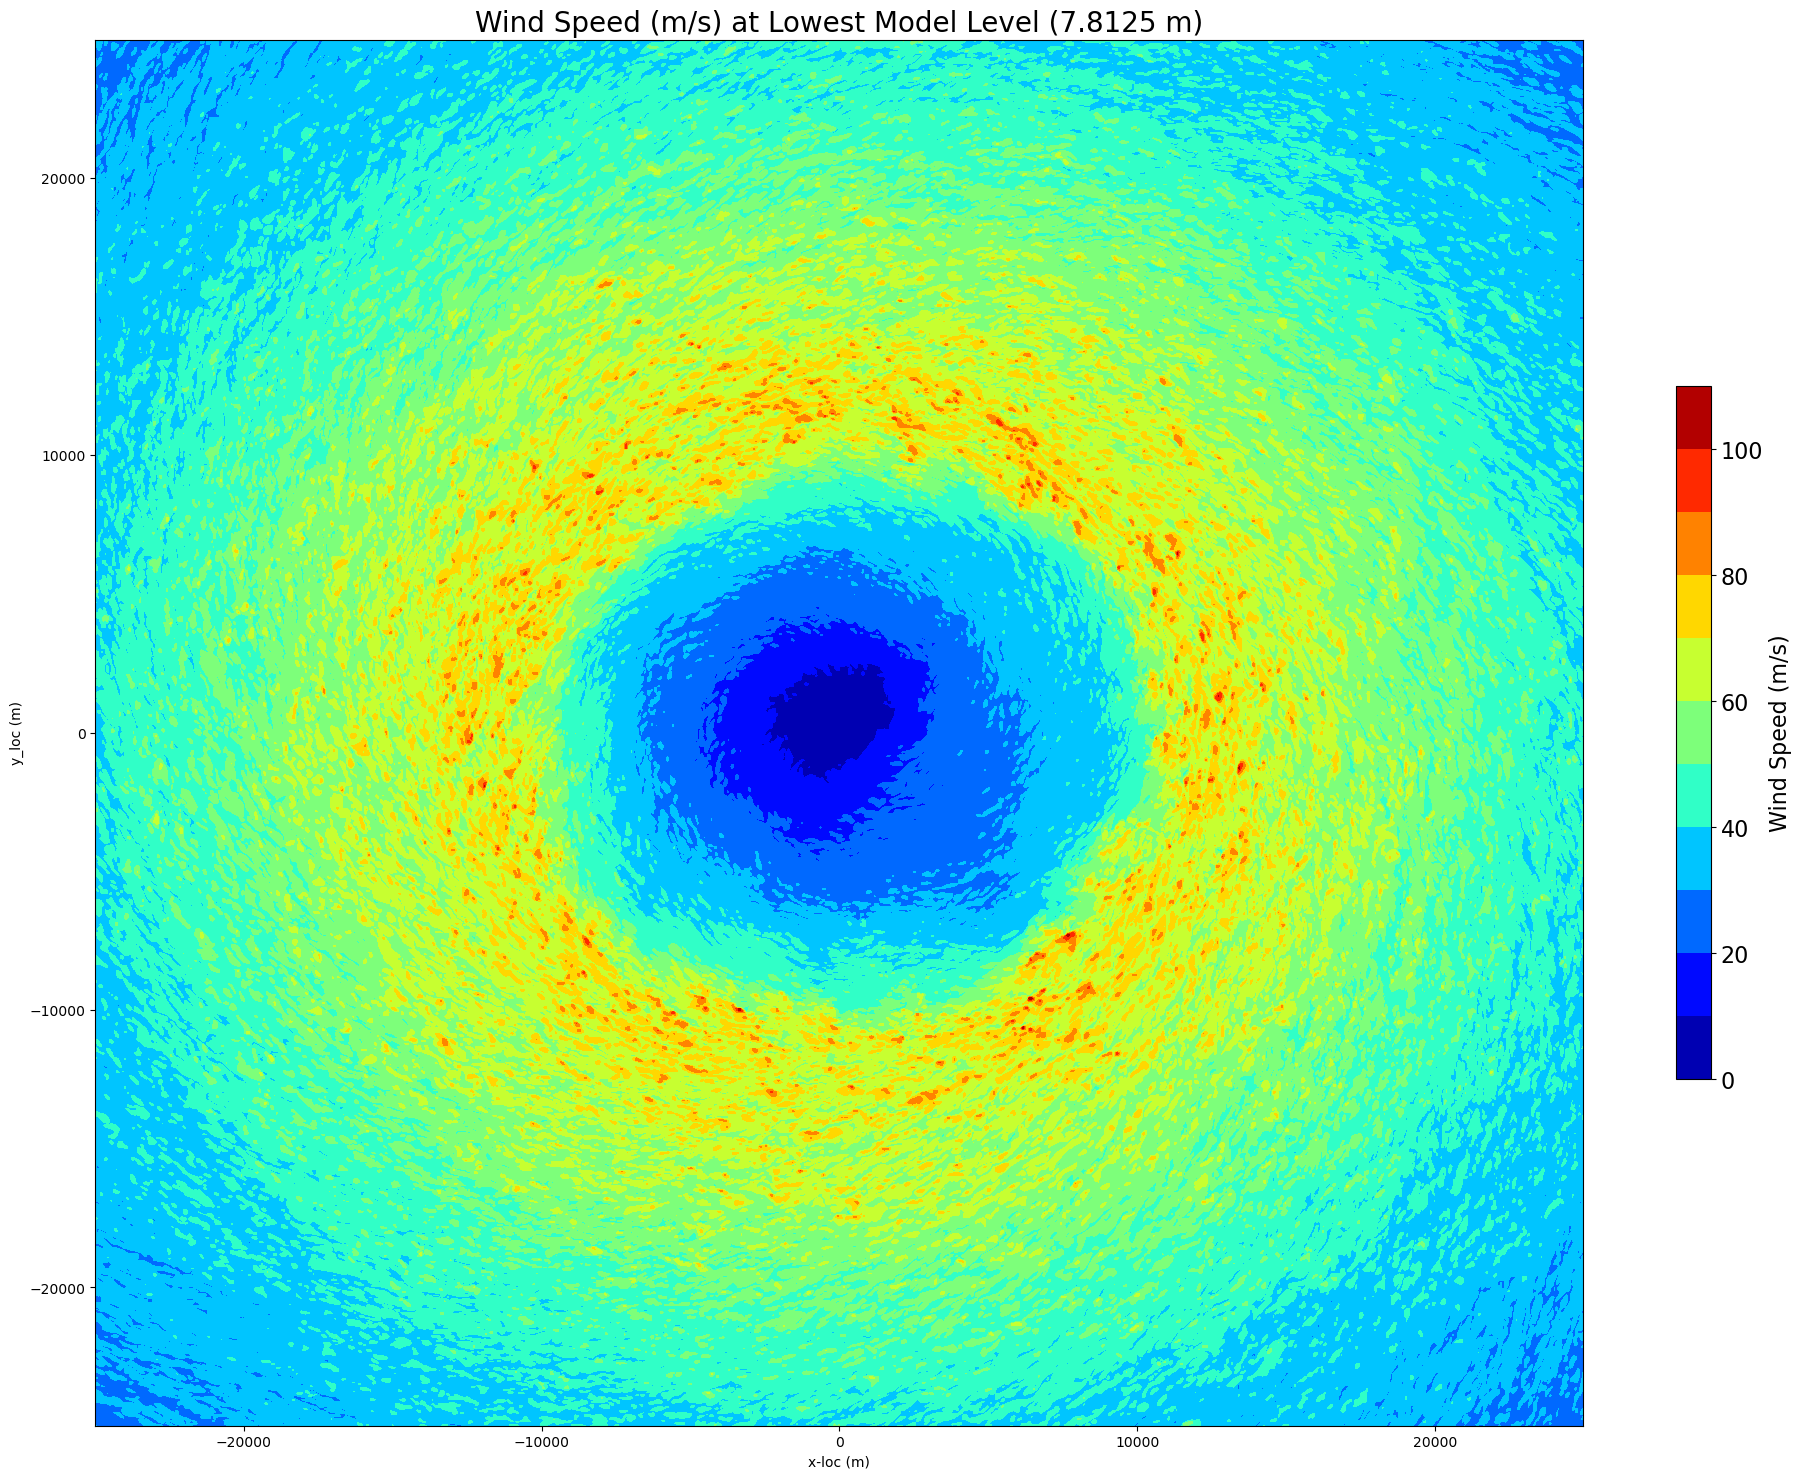

In [23]:
fig = plt.figure(figsize=(24,18))
ax=plt.subplot(1,1,1)
CF = ax.contourf(dx, dy, wspd.isel(time=0), levels=np.arange(0, 115, 10), cmap='jet')
cbar = plt.colorbar(CF,shrink=0.5)
cbar.ax.tick_params(labelsize=16)
cbar.ax.set_ylabel("Wind Speed (m/s)",fontsize=16)
ax.set_xlabel('x-loc (m)')
ax.set_ylabel('y_loc (m)')
ax.set_title('Wind Speed (m/s) at Lowest Model Level (7.8125 m)', fontsize=20)

In [24]:
wspd.isel(nj=1030,ni=1038), dx.isel(ni=1038), dy.isel(nj=1030)

(<xarray.DataArray (time: 1)>
 <Quantity([57.328747], 'meter / second')>
 Coordinates:
   * time     (time) datetime64[ns] 2000-01-01T00:00:04,
 <xarray.DataArray 'xh' ()>
 <Quantity(7453.125, 'meter')>,
 <xarray.DataArray 'yh' ()>
 <Quantity(7203.125, 'meter')>)

Text(0.5, 1.0, 'Wind Speed (m/s) at 7.8125 m -- Northeastern Quadrant')

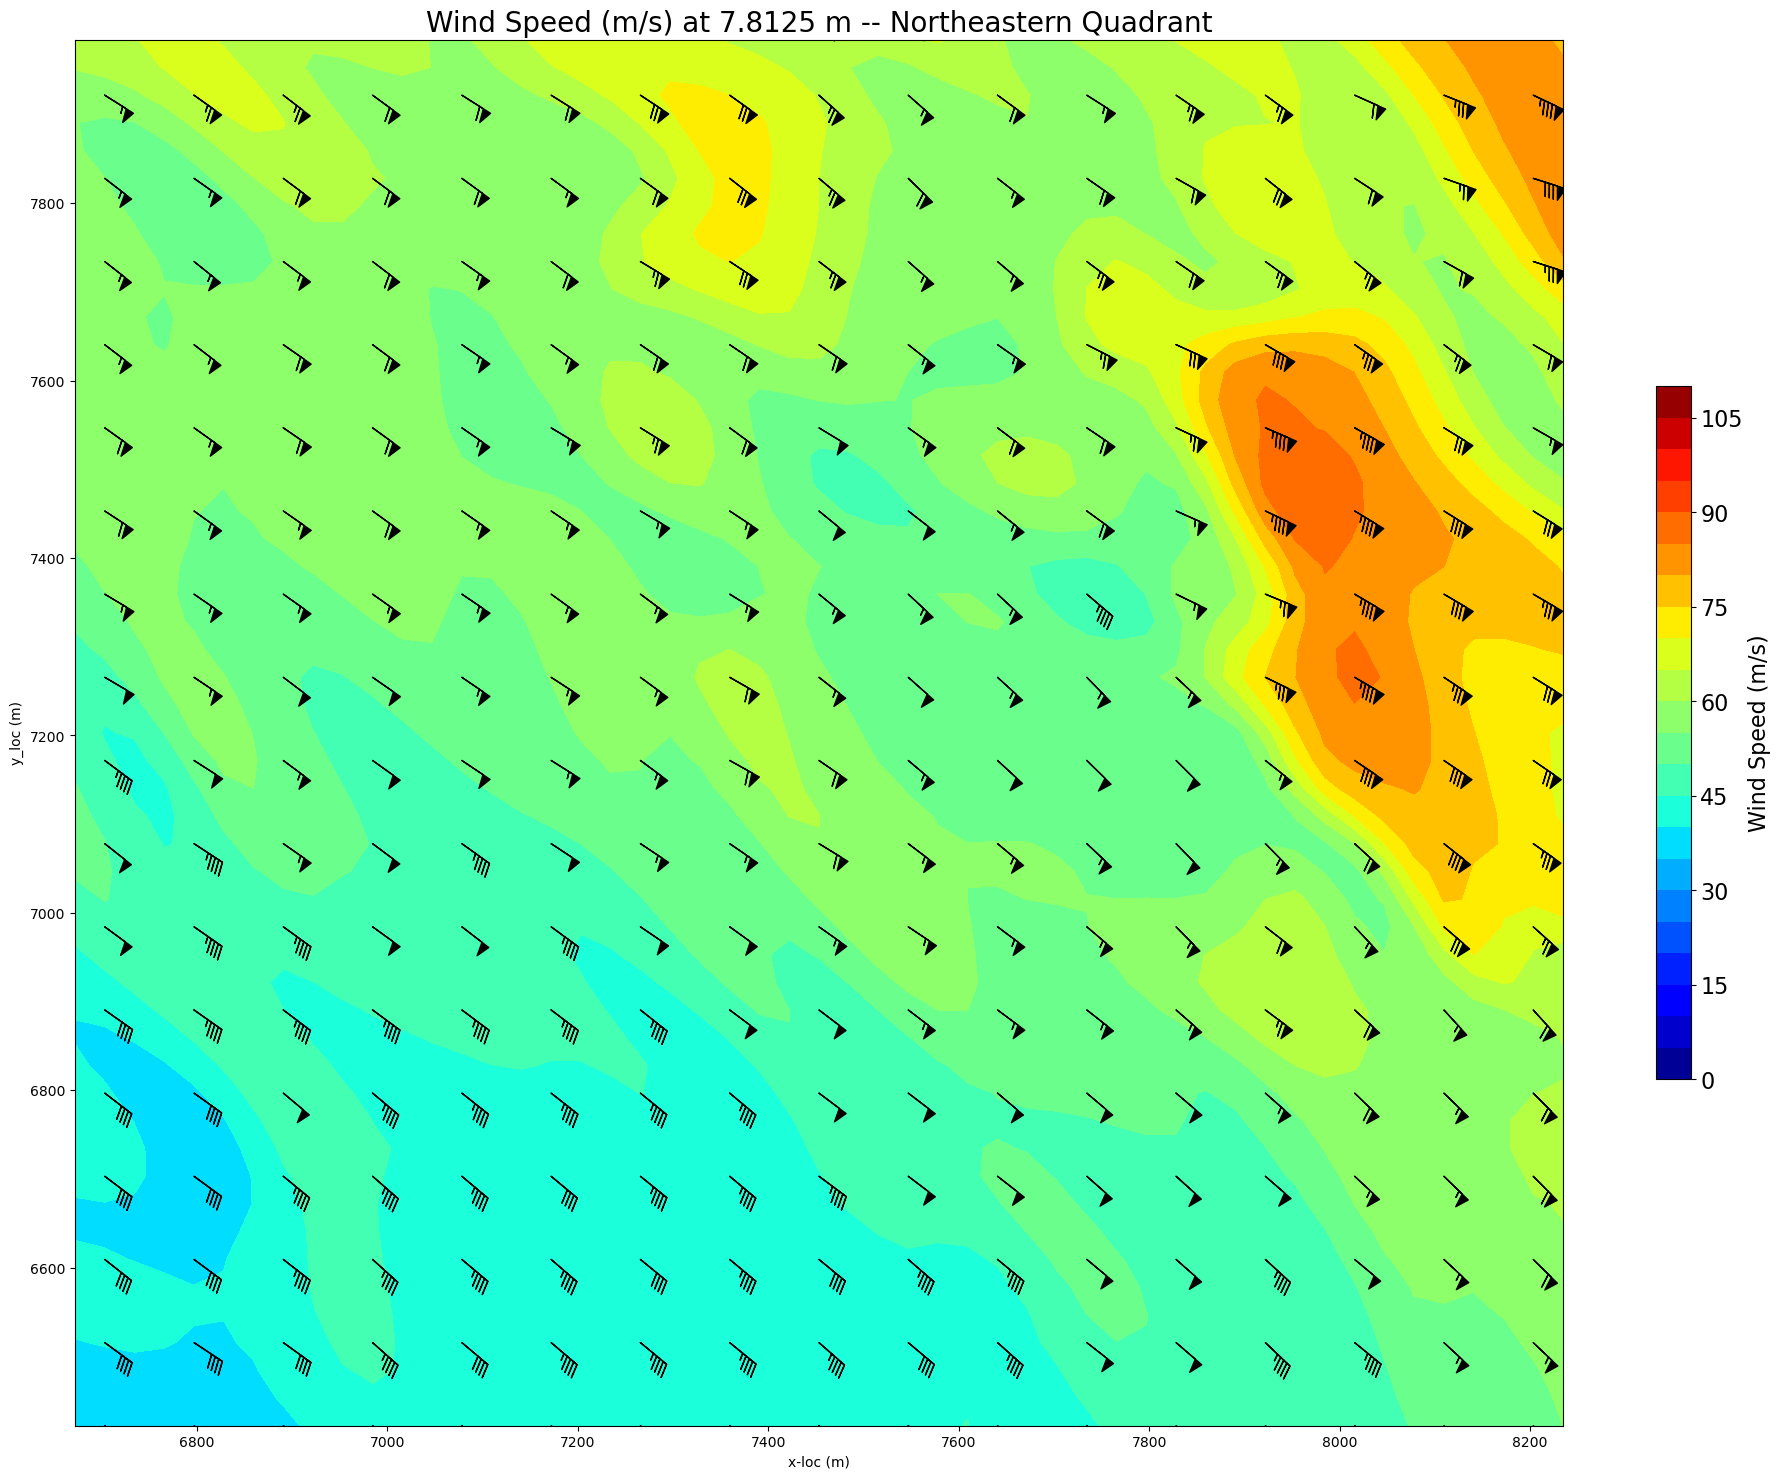

In [25]:
fig = plt.figure(figsize=(24,18))
ax=plt.subplot(1,1,1)
# 50 x 50 gridpoint plot surrounding the index location of wind speed maximum
ax.set_xlim(dx.isel(ni=1013), dx.isel(ni=1063)) # 25 below 1038 and 25 above 1038
ax.set_ylim(dy.isel(nj=1005), dy.isel(nj=1055)) # 25 below 1030 and 25 above 1030
CF = ax.contourf(dx, dy, wspd.isel(time=0), levels=np.arange(0, 115, 5), cmap='jet')
skip=3
ax.barbs(dx[::skip], dy[::skip], u.isel(time=0)[::skip,::skip].values, v.isel(time=0)[::skip,::skip].values)
cbar = plt.colorbar(CF,shrink=0.5)
cbar.ax.tick_params(labelsize=16)
cbar.ax.set_ylabel("Wind Speed (m/s)",fontsize=16)
ax.set_xlabel('x-loc (m)')
ax.set_ylabel('y_loc (m)')
ax.set_title('Wind Speed (m/s) at 7.8125 m -- Northeastern Quadrant', fontsize=20)

In [26]:
num_x = ds.ni
num_y = ds.nj
num_z = ds.nk

dx = ds['xh']*units('m')
dy = ds['yh']*units('m')
dz = ds['zh']*units('m')

u10 = ds['u10']
v10 = ds['v10']
theta = ds['th']
press = ds['prs']
wv = ds['qv']
wc = ds['qc']
wr = ds['qr']
u = ds['u']
v = ds['v']
w = ds['w']

x_space = 31.25*units('m')
y_space = 31.25*units('m')
z_space = 15.625*units('m')

In [27]:
lev = 1

u = u.isel(nk=lev)
v = v.isel(nk=lev)

wspd = mpcalc.wind_speed(u, v)
wspd.max()

<xarray.DataArray ()>
<Quantity(117.35725402832031, 'meter / second')>

In [28]:
dz[1]

<xarray.DataArray 'zh' ()>
<Quantity(23.4375, 'meter')>

Text(0.5, 1.0, 'Wind Speed (m/s) at 23.4375 m')

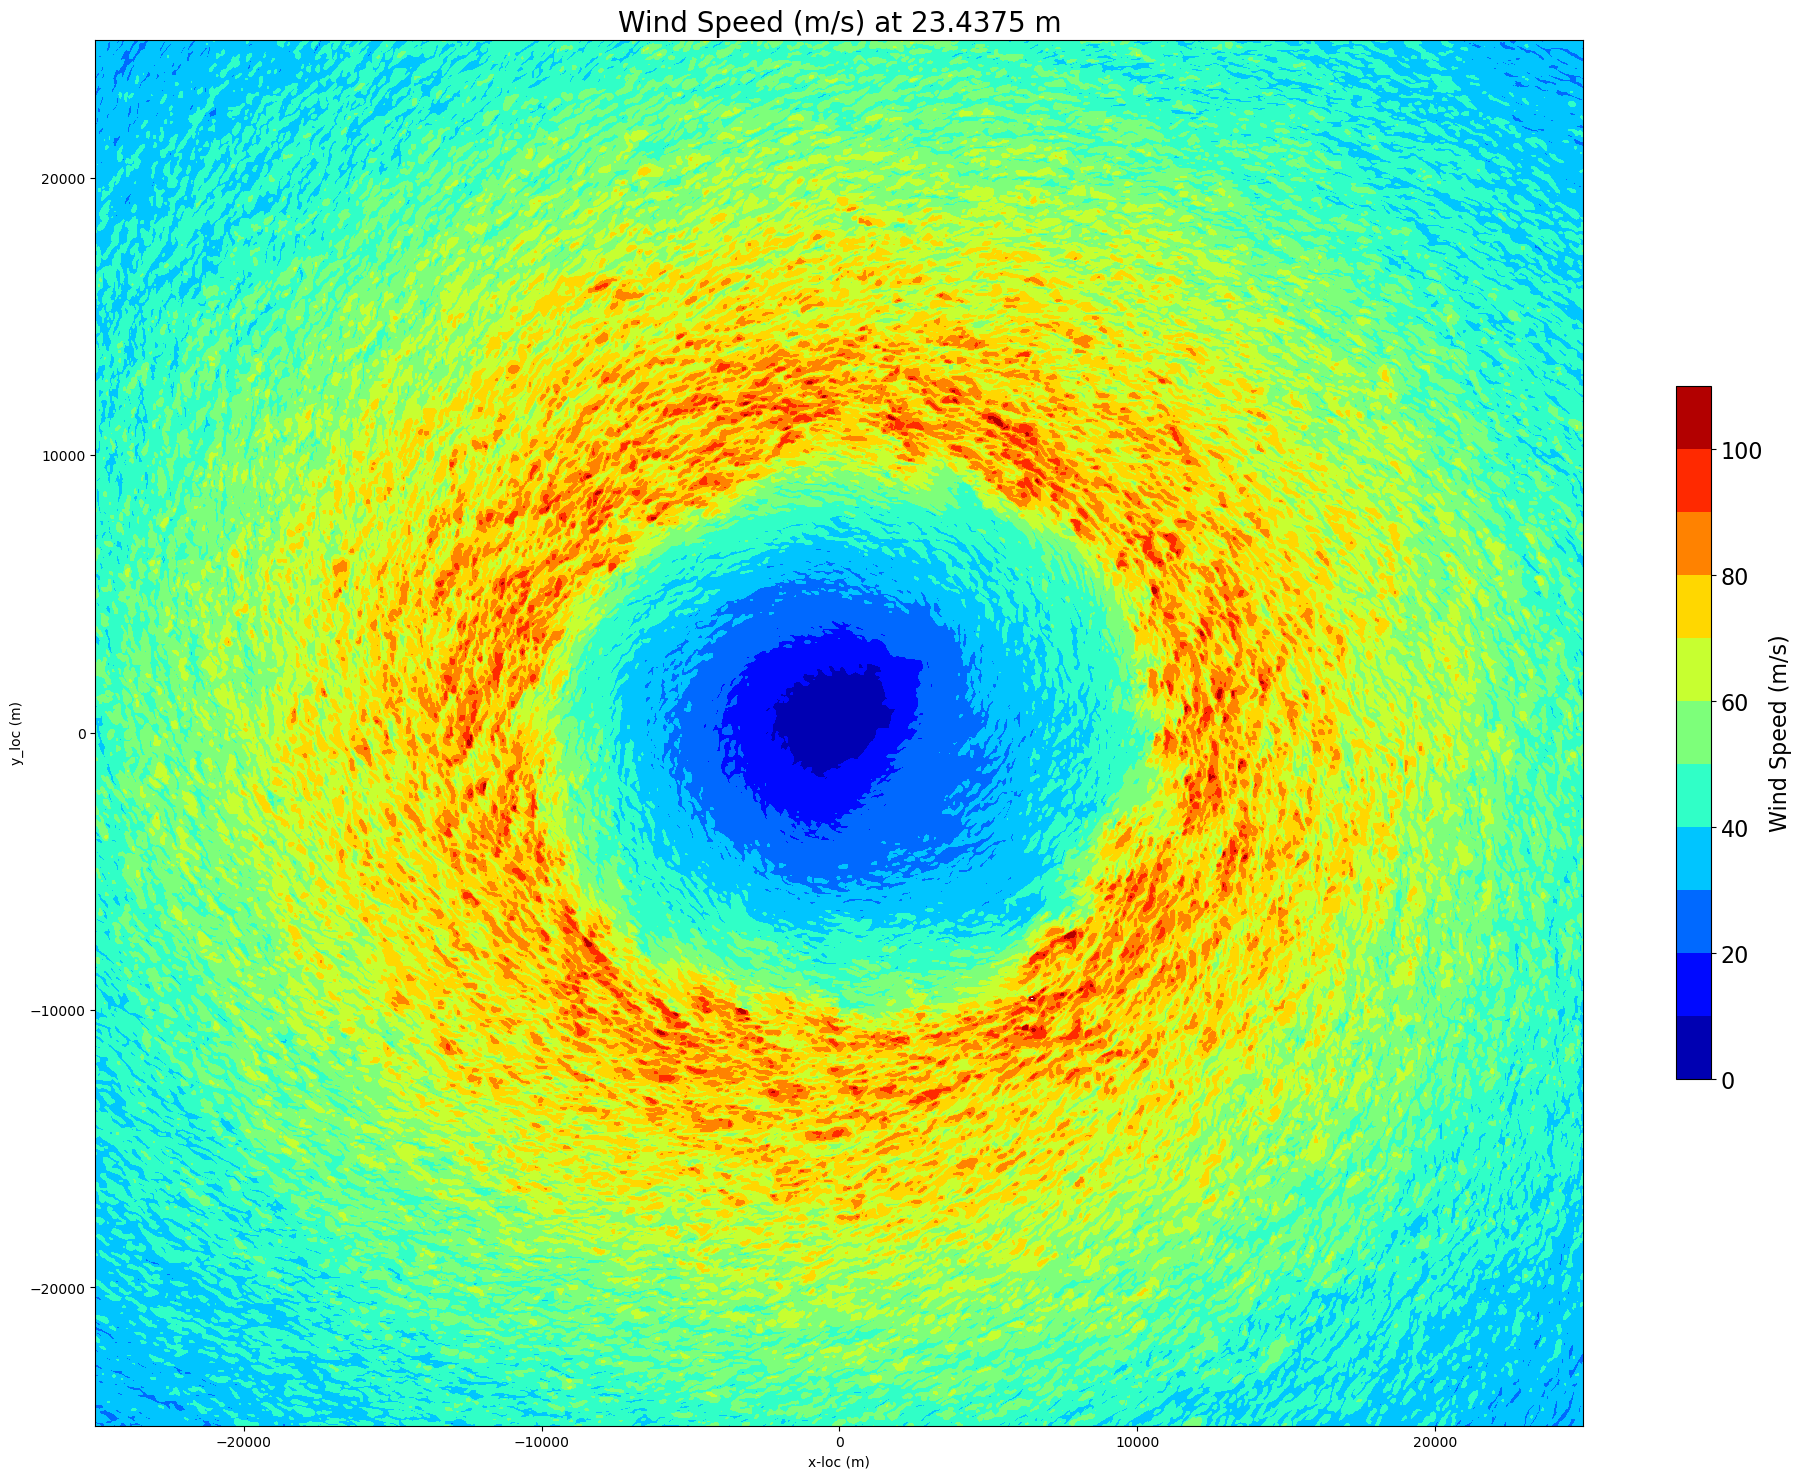

In [32]:
fig = plt.figure(figsize=(24,18))
ax=plt.subplot(1,1,1)
CF = ax.contourf(dx, dy, wspd.isel(time=0), levels=np.arange(0, 115, 10), cmap='jet')
cbar = plt.colorbar(CF,shrink=0.5)
cbar.ax.tick_params(labelsize=16)
cbar.ax.set_ylabel("Wind Speed (m/s)",fontsize=16)
ax.set_xlabel('x-loc (m)')
ax.set_ylabel('y_loc (m)')
ax.set_title('Wind Speed (m/s) at 23.4375 m', fontsize=20)

In [30]:
wspd.isel(nj=1030,ni=1038), dx.isel(ni=1038), dy.isel(nj=1030)

(<xarray.DataArray (time: 1)>
 <Quantity([59.643333], 'meter / second')>
 Coordinates:
   * time     (time) datetime64[ns] 2000-01-01T00:00:04,
 <xarray.DataArray 'xh' ()>
 <Quantity(7453.125, 'meter')>,
 <xarray.DataArray 'yh' ()>
 <Quantity(7203.125, 'meter')>)

Text(0.5, 1.0, 'Wind Speed (m/s) at 23.4375 m -- Northeastern Quadrant')

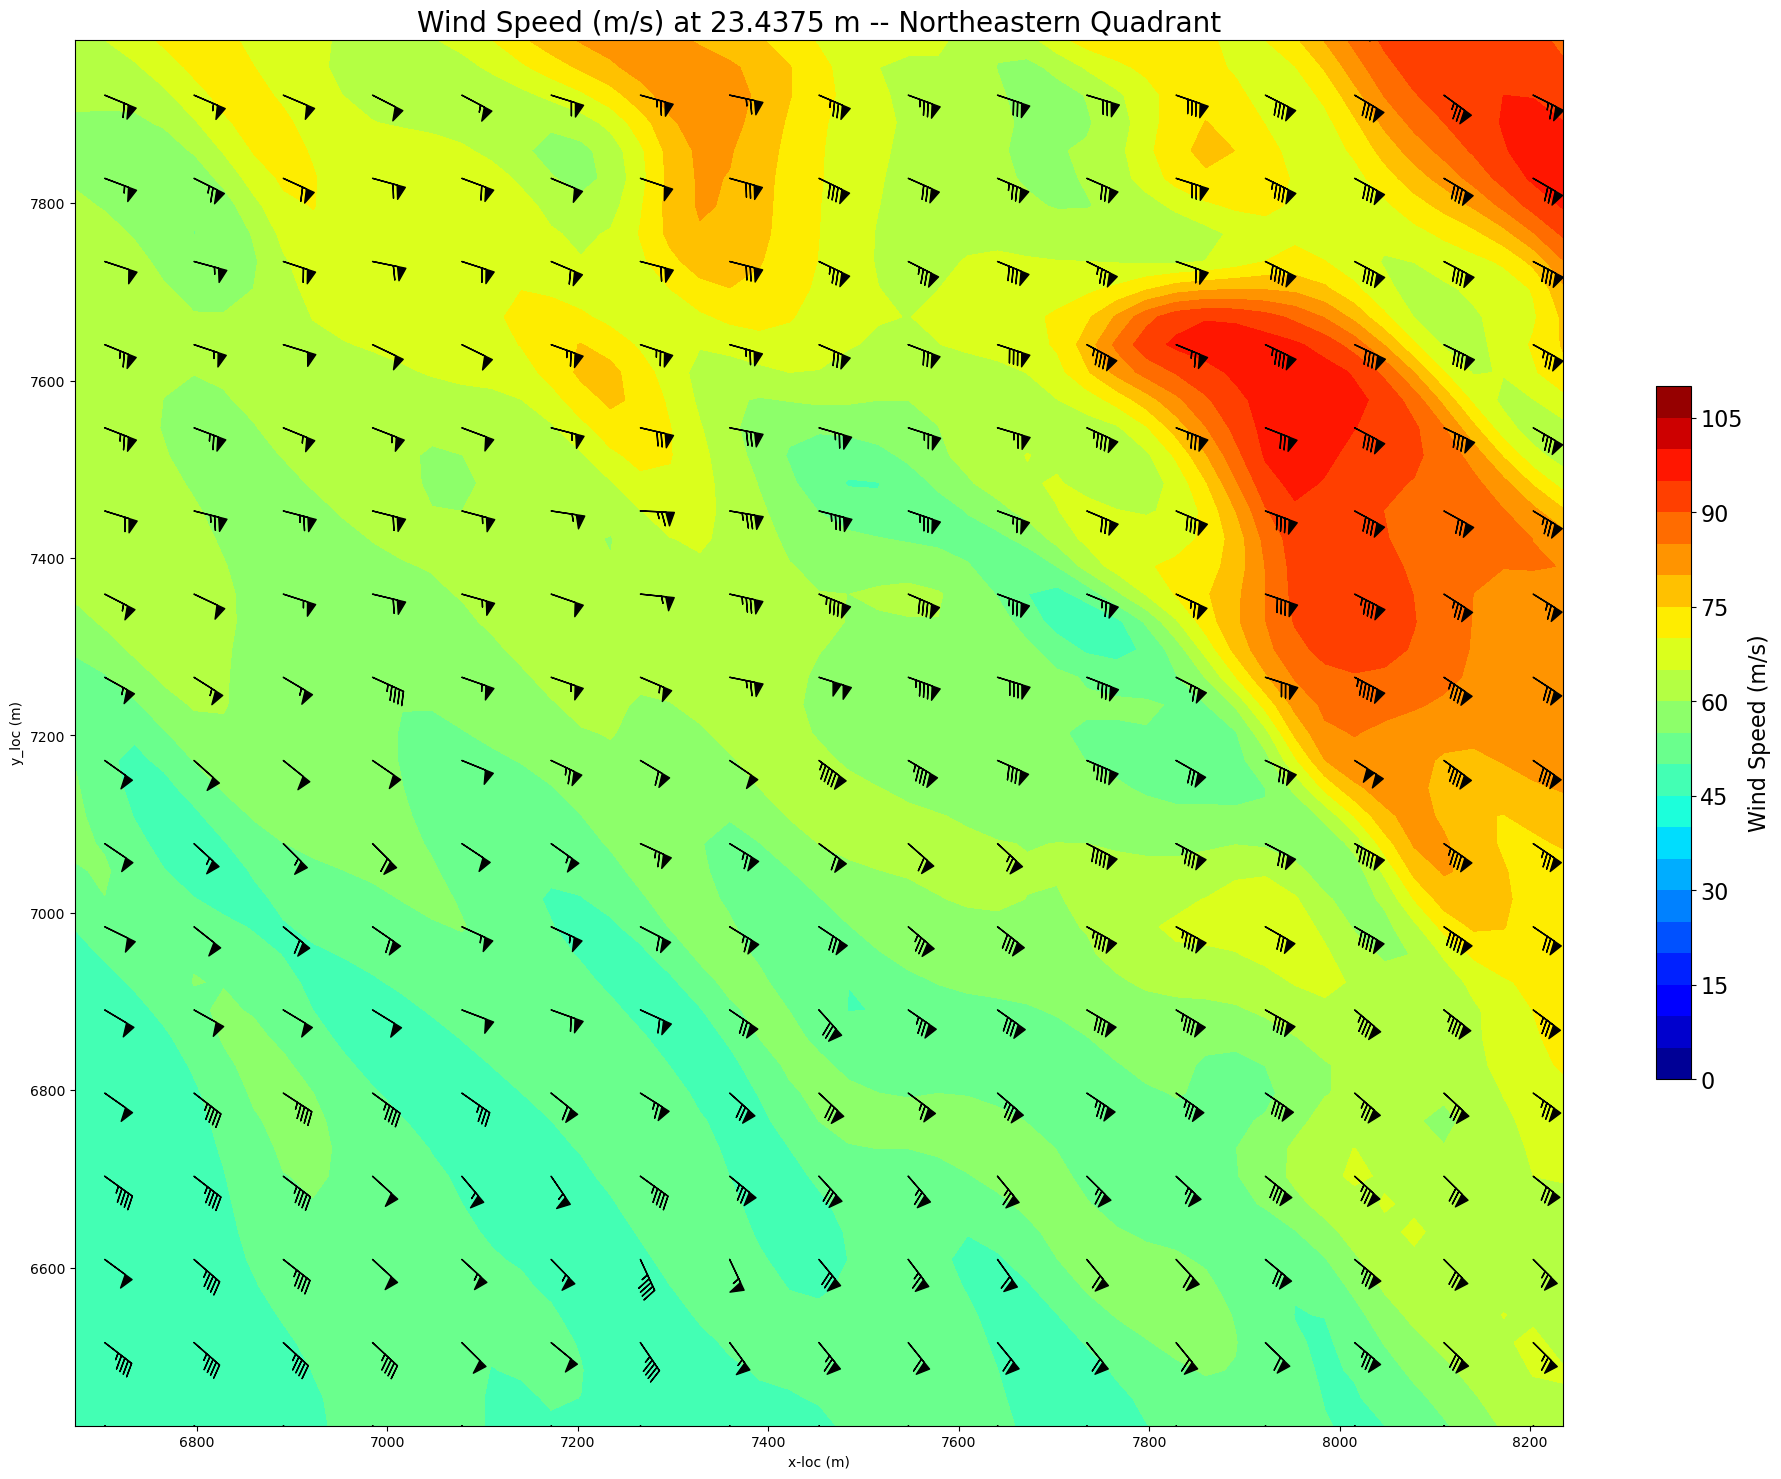

In [31]:
fig = plt.figure(figsize=(24,18))
ax=plt.subplot(1,1,1)
# 50 x 50 gridpoint plot surrounding the index location of wind speed maximum
ax.set_xlim(dx.isel(ni=1013), dx.isel(ni=1063)) # 25 below 1038 and 25 above 1038
ax.set_ylim(dy.isel(nj=1005), dy.isel(nj=1055)) # 25 below 1030 and 25 above 1030
CF = ax.contourf(dx, dy, wspd.isel(time=0), levels=np.arange(0, 115, 5), cmap='jet')
skip=3
ax.barbs(dx[::skip], dy[::skip], u10.isel(time=0)[::skip,::skip].values, v10.isel(time=0)[::skip,::skip].values)
cbar = plt.colorbar(CF,shrink=0.5)
cbar.ax.tick_params(labelsize=16)
cbar.ax.set_ylabel("Wind Speed (m/s)",fontsize=16)
ax.set_xlabel('x-loc (m)')
ax.set_ylabel('y_loc (m)')
ax.set_title('Wind Speed (m/s) at 23.4375 m -- Northeastern Quadrant', fontsize=20)